# Seaborn으로 시각화
---
* Seaborn은 Matplotlib을 기반으로 한다.
* 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.
* 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

### seaborn의 장점
* matplotlib에 비해 시각적으로 우수한 결과물을 만들어 낸다.
* matplotlib에 비해 옵션이 간단하다.
* seaborn의 경우 data exploration에 좀 더 특화

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Loading
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### seaborn에서 히스토그램 

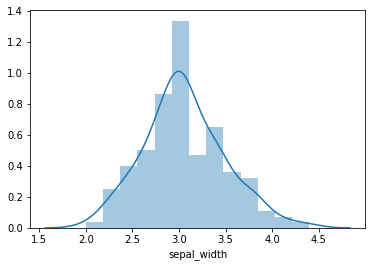

In [ ]:
sns.distplot(iris['sepal_width'])

plt.show()

만약 density 그래프를 표시하고 싶지 않으면 kde=False

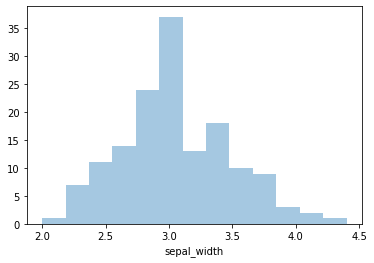

In [ ]:
sns.distplot(iris['sepal_width'], kde=False)
plt.show()

만약 density plot만 그리고 싶다면 hist=False

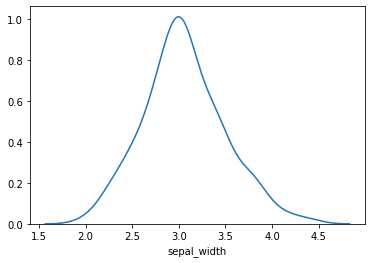

In [ ]:
sns.distplot(iris['sepal_width'], hist=False)
plt.show()

histogram에 rug를 같이 표시

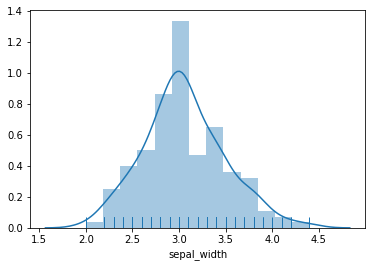

In [ ]:
sns.distplot(iris['sepal_width'], rug=True)
plt.show()

### 여러개 그룹의 히스토그램, 밀도곡선 그리기
setosa, versicolor, virginica 종의 3개 그룹(groups)의 히스토그램과 밀도곡선을 그룹별로 색깔을 다르게 하여
 표시할 수 있다.

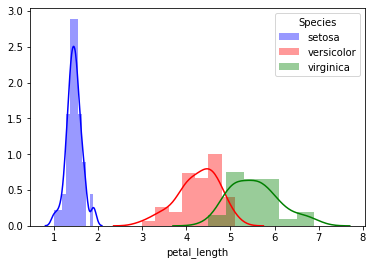

In [ ]:
# seaborn 사용하기
sns.distplot(iris[iris.species == "setosa"]["petal_length"], 
             color="blue", label="setosa")

sns.distplot(iris[iris.species == "versicolor"]["petal_length"], 
             color="red", label="versicolor")

sns.distplot(iris[iris.species == "virginica"]["petal_length"], 
             color="green", label="virginica")

plt.legend(title="Species")
plt.show()


###  seaborn 으로 막대 그래프 그리기

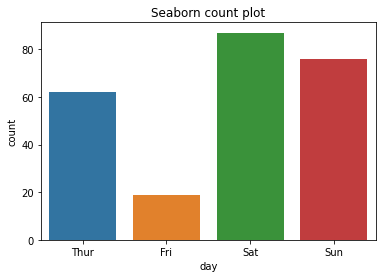

In [9]:
# 요일별 데이터 빈도
sns.countplot('day', data=tips)
plt.title('Seaborn count plot')
plt.show()

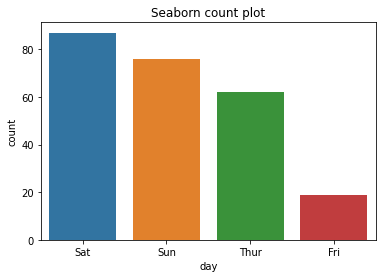

In [8]:
# 요일별 데이터 빈도
# 값의 순서대로 막대그래프 정렬
sns.countplot('day', data=tips, order=tips['day'].value_counts().index) 
plt.title('Seaborn count plot')
plt.show()


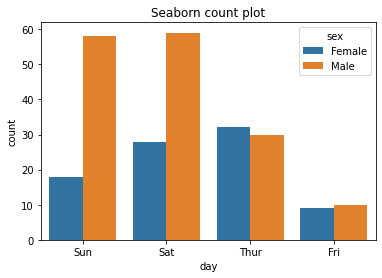

In [ ]:
# 요일별 성별 데이터 빈도
sns.countplot('day', hue='sex', data=tips)
plt.title('Seaborn count plot')
plt.show()

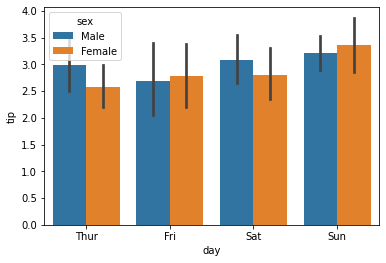

In [12]:
# 요일별 성별에 따른 total bill의 평균을 막대 그래프로
sns.barplot(x="day", y="tip", hue="sex", data=tips)
plt.show()

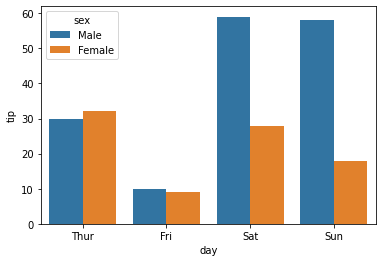

In [15]:
# 요일별 성별에 따른 total bill의 count을 막대 그래프로

sns.barplot(x="day", y="tip", hue="sex", data=tips, estimator=len)
plt.show()

In [ ]:
?sns.barplot

### 산점도 그리기
seaborn 의 산점도 코드는 깔끔하고 이해하기에 쉬으며, 범례도 잘 알아서 색깔과 크기를 표시해서 편리하다.

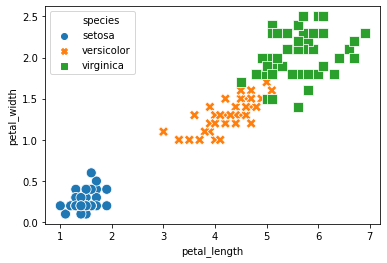

In [16]:
### seaborn으로 산점도 그리기

# 그룹별 산점도
sns.scatterplot(x='petal_length', 
               y='petal_width', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()


### regplot
* regplot 메소드를 사용하면 회귀선을 함께 그릴수 있다. 
* 회귀선을 제거하려면 fit_reg = False

Text(0, 0.5, 'Tip')

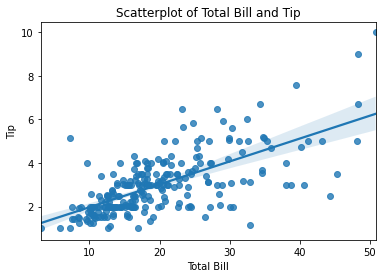

In [ ]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

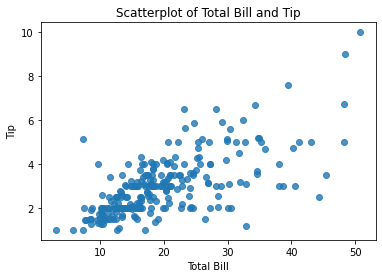

In [ ]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

### jointplot
* jointplot 메소드를 사용하면 산점도 그래프와 히스토그램을 한번에 그릴 수 있다. 

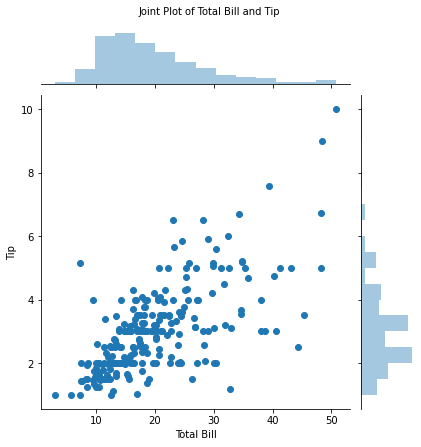

In [ ]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

* 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 
* 이를 구분하기 쉽게 hexbin을 사용할 수 있다.
* hexbin그래프를 사용하기 위해 kind=hex로 지정한다.

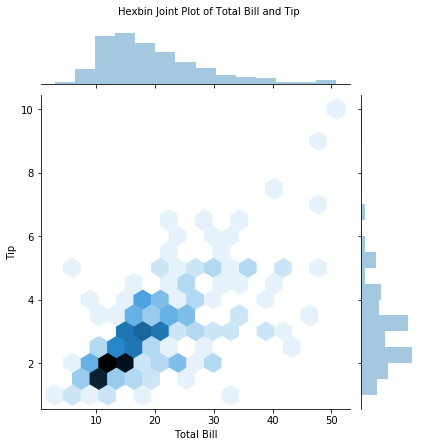

In [ ]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
plt.show()

### kdeplot
* 커널 밀도 그래프를 그리기 위해서 kdeplot을 사용한다.
* shade = True를 사용하면 음영 표현이 가능하다.

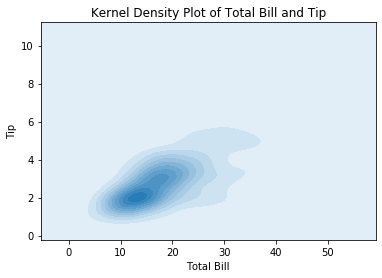

In [ ]:
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')
plt.show()

### 박스 그래프 그리기

Text(0, 0.5, 'Total Bill')

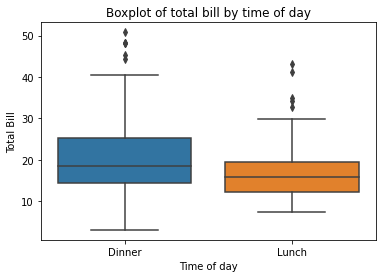

In [ ]:
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

### 바이올린 그래프
상자그래프에서 데이터 분포를 커널 밀도 추정을 통해 그린 그래프가 바이올린 그래프이다.

Text(0, 0.5, 'Total Bill')

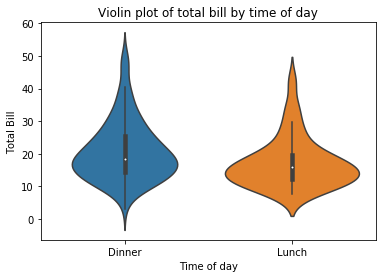

In [ ]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

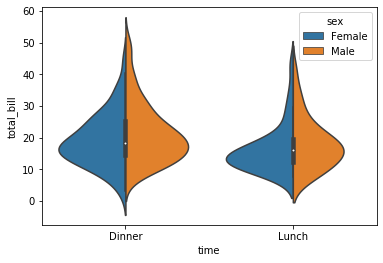

In [ ]:
# 남/여 색상 구별하기
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

###  산점도 행렬 그리기

산점도 행렬은  한 번에 변수 간 관계를 일목요연하게 볼 수 있다.

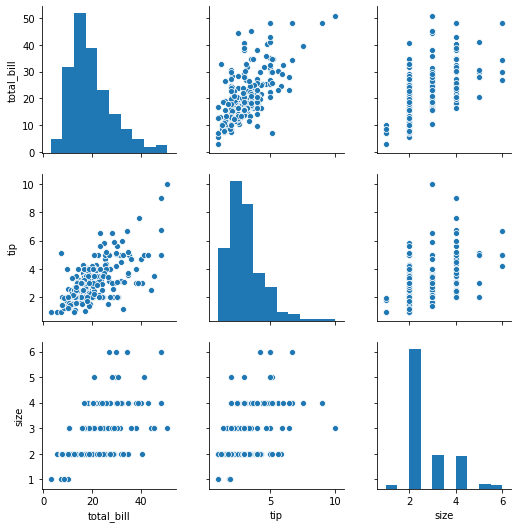

In [ ]:
fig = sns.pairplot(tips)

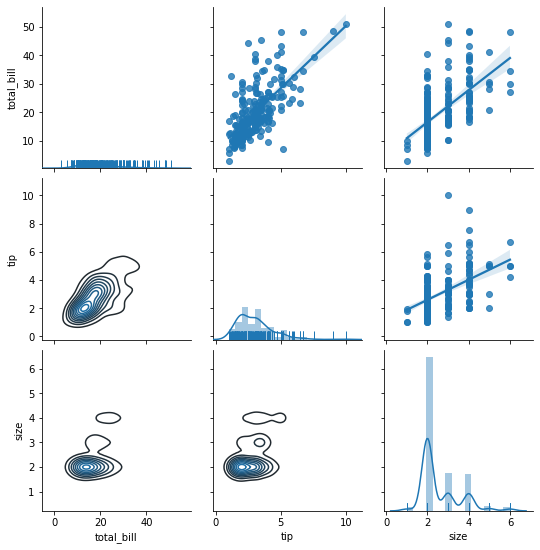

In [ ]:
# 대각선을 기준으로 위쪽/ 아래쪽을 다른 그래프로 그린다.
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

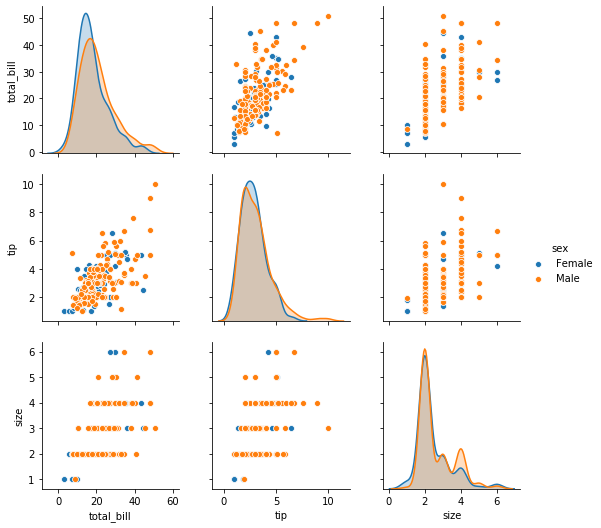

In [ ]:
# 남/여를 색깔로 구분하여 그린다.
fig = sns.pairplot(tips, hue='sex')

### FacetGrid
그룹별로 그래프를 나누어 그릴 수 있다.

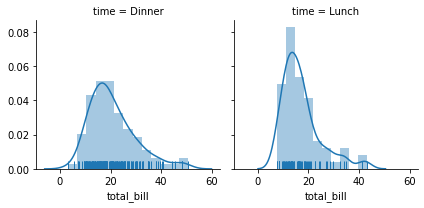

In [ ]:
# time을 그룹으로 2개로 나누어 그린다.
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True)

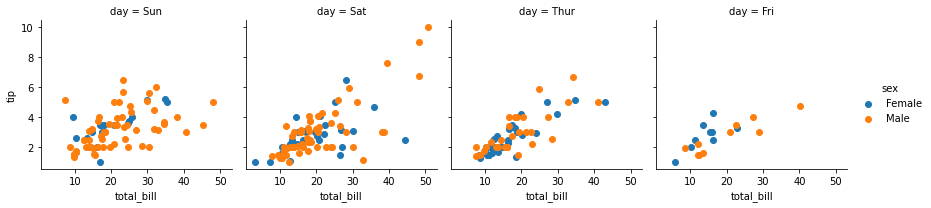

In [ ]:
# 그래프를 day를 기준으로 나눈다.
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend()

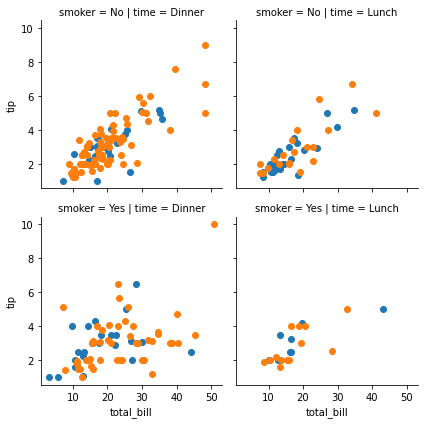

In [ ]:
# 그래프를 행/열 구조로 나누어 그린다.
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')